# **ML Assignment 2 - Classification Models**

# Importing Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


# Loading and Cleaning the Data

In [2]:
import pandas as pd
import os

# 1. Locate the CSV file in the downloaded path
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
full_path = os.path.join(path, csv_file)

# 2. Load the dataset
df = pd.read_csv(full_path)

# 3. Quick Clean: Fix 'TotalCharges' (Convert to numeric, fill empty spaces with 0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

# 4. Drop CustomerID (It's not a feature for prediction)
df.drop('customerID', axis=1, inplace=True)

# 5. Convert Target 'Churn' to binary (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(f"Dataset loaded: {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Dataset loaded: 7043 rows and 20 columns.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# **EDA**

In [4]:
#Statistical Summary

# Check for missing values and data types
print(df.info())

# Get descriptive statistics for numerical columns
# This helps identify the scale of features like MonthlyCharges ($20-$118)
stats = df.describe()
print(stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


/tmp/ipython-input-3564301972.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


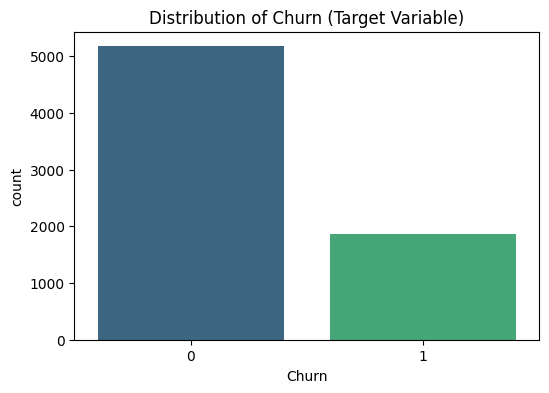

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [5]:
# Checking for Class Imbalance (Skewness)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn (Target Variable)')
plt.show()

# Calculate the percentage
print(df['Churn'].value_counts(normalize=True) * 100)

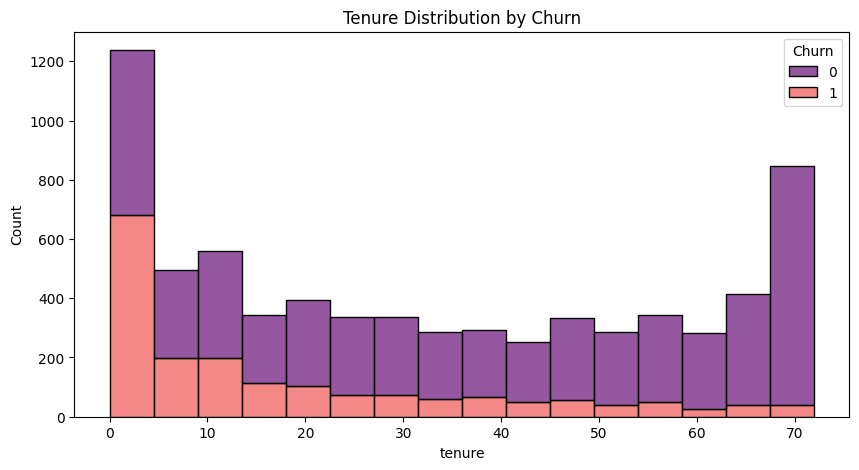

/tmp/ipython-input-231821061.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Churn'] == 0, 'MonthlyCharges'], label='Stayed', shade=True)
/tmp/ipython-input-231821061.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Churn'] == 1, 'MonthlyCharges'], label='Churned', shade=True)


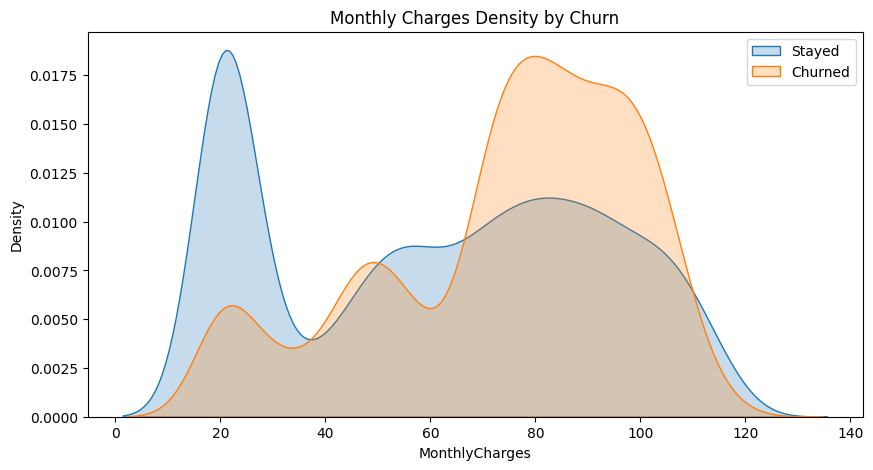

In [6]:
# Feature Visualizations

# Example: Tenure vs Churn
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple="stack", palette='magma')
plt.title('Tenure Distribution by Churn')
plt.show()

# Example: Monthly Charges vs Churn
plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[df['Churn'] == 0, 'MonthlyCharges'], label='Stayed', shade=True)
sns.kdeplot(df.loc[df['Churn'] == 1, 'MonthlyCharges'], label='Churned', shade=True)
plt.title('Monthly Charges Density by Churn')
plt.legend()
plt.show()

# Handling Categorical Features (Encoding)

In [7]:
# Convert all categorical text columns into numbers
df_encoded = pd.get_dummies(df, drop_first=True)

# Define X (Features) and y (Target)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print("Features after encoding:", X.shape[1])
# This should give you ~30 features, meeting your "Minimum 12" requirement!

Features after encoding: 30


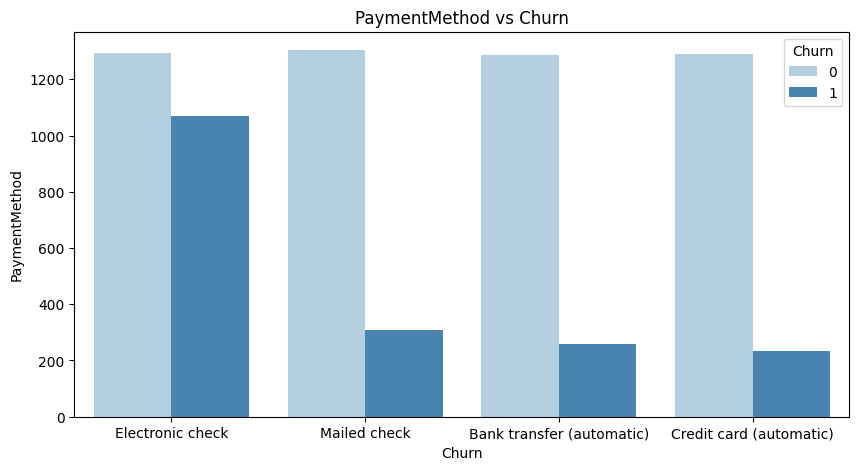

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PaymentMethod',palette= 'Blues',hue='Churn')
plt.xlabel('Churn')
plt.ylabel('PaymentMethod')
plt.title('PaymentMethod vs Churn')
plt.show()

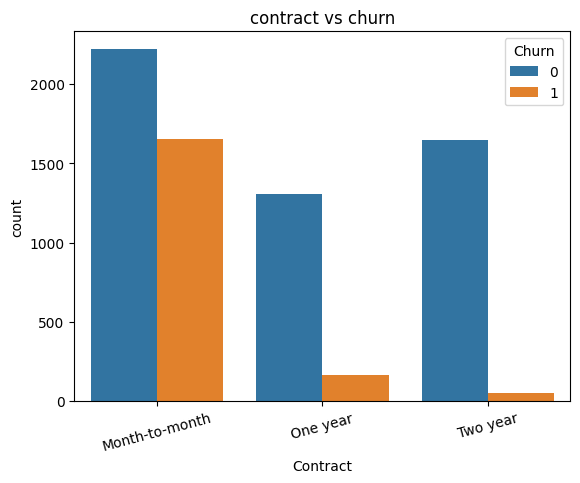

In [17]:
sns.countplot(x=df['Contract'], hue=df['Churn'])
plt.title("contract vs churn")
plt.xticks(rotation=15)
plt.show()

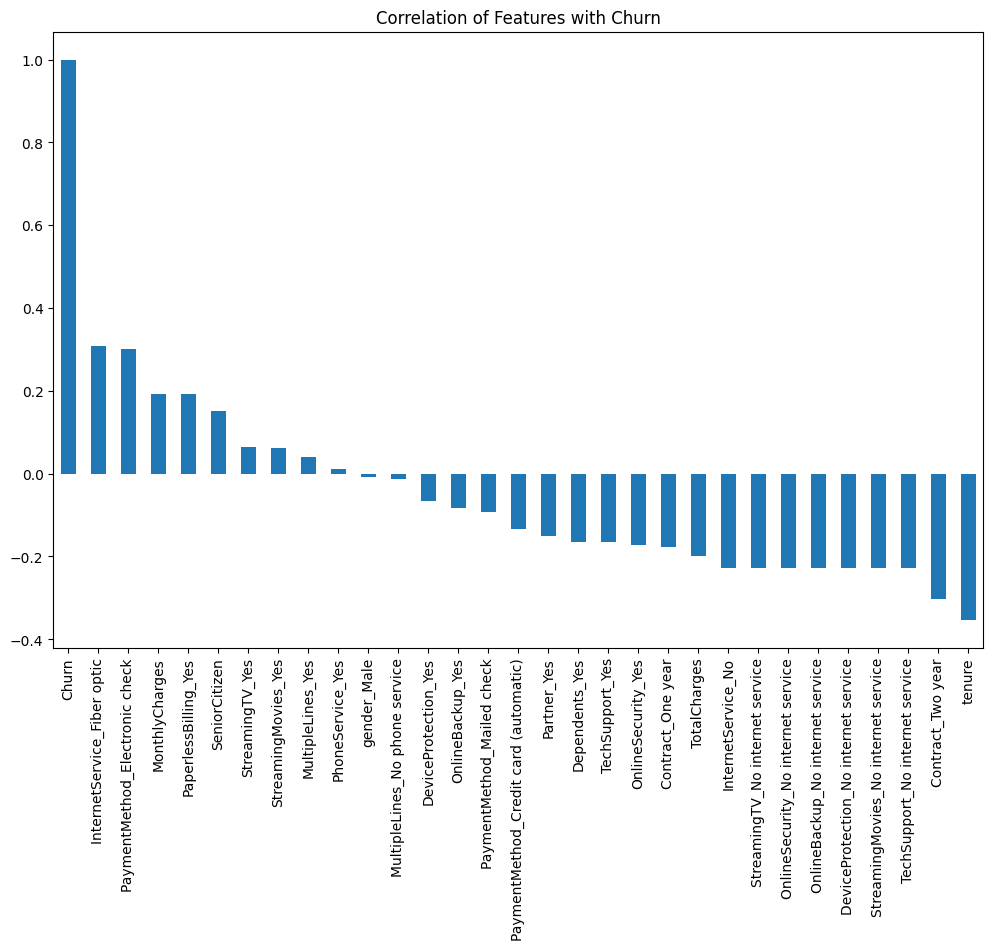

In [8]:
# Correlation Heatmap

plt.figure(figsize=(12, 8))
# We only plot a subset of features if the encoded version is too wide
correlation = df_encoded.corr()['Churn'].sort_values(ascending=False)
correlation.plot(kind='bar')
plt.title('Correlation of Features with Churn')
plt.show()

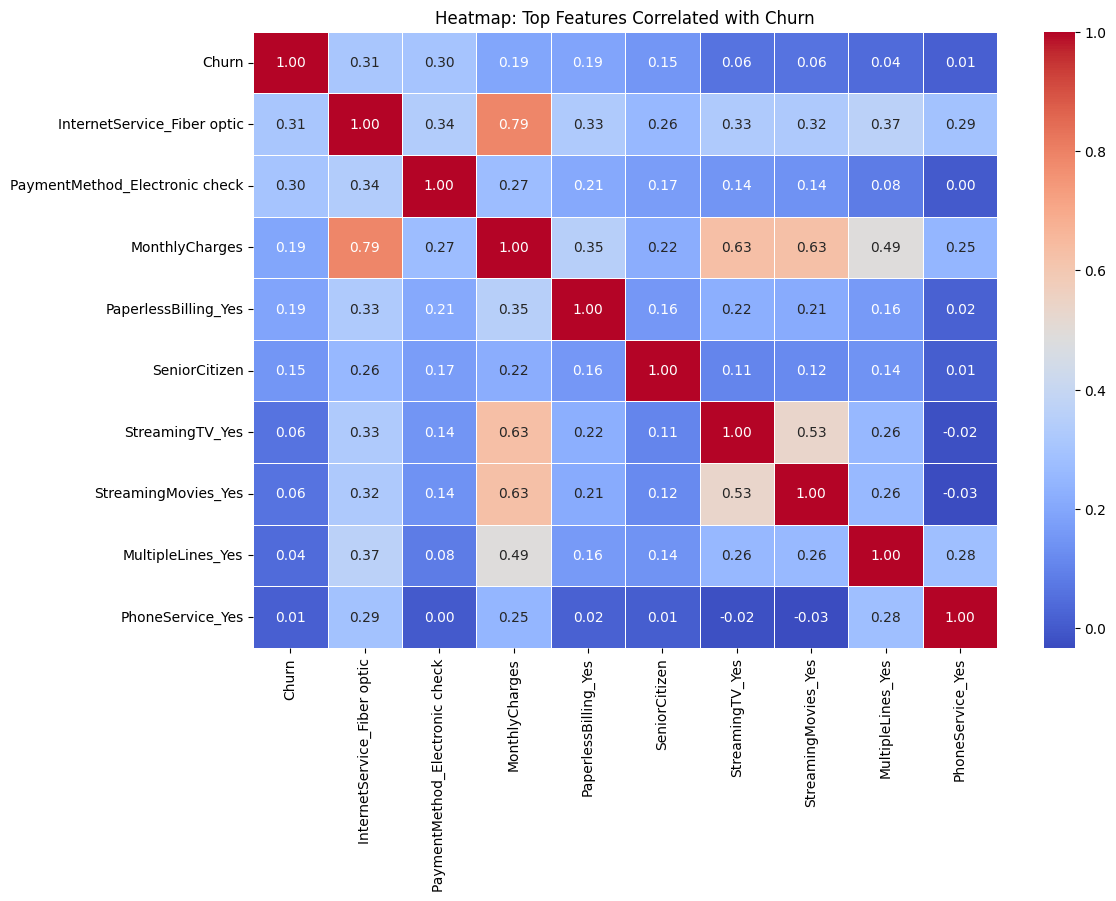

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Find the top 10 features most correlated with Churn (positive or negative)
top_corr_features = corr_matrix['Churn'].sort_values(ascending=False).head(10).index
top_corr_matrix = df_encoded[top_corr_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap: Top Features Correlated with Churn')
plt.show()

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# List of numerical columns to scale
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a copy to keep original data safe
X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

print("Data Scaling Complete. Ready for Model Training.")

Data Scaling Complete. Ready for Model Training.


# Model Training, Test & Evaluation

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score,
                             recall_score, f1_score, matthews_corrcoef)
import pandas as pd

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest (Ensemble)": RandomForestClassifier(n_estimators=100),
    "XGBoost (Ensemble)": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 3. Create a list to store results
results_list = []

# 4. Loop through models, train, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Needed for AUC

    # Calculate each mandatory metric
    results_list.append({
        "ML Model Name": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "AUC": round(roc_auc_score(y_test, y_proba), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1": round(f1_score(y_test, y_pred), 4),
        "MCC": round(matthews_corrcoef(y_test, y_pred), 4)
    })

# 5. Display the final comparison table
comparison_df = pd.DataFrame(results_list)
print(comparison_df.to_markdown(index=False))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:37:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


| ML Model Name            |   Accuracy |    AUC |   Precision |   Recall |     F1 |    MCC |
|:-------------------------|-----------:|-------:|------------:|---------:|-------:|-------:|
| Logistic Regression      |     0.8211 | 0.8622 |      0.6862 |   0.5979 | 0.639  | 0.523  |
| Decision Tree            |     0.8062 | 0.8482 |      0.7049 |   0.4611 | 0.5575 | 0.4566 |
| kNN                      |     0.7722 | 0.7971 |      0.5765 |   0.5255 | 0.5498 | 0.3985 |
| Naive Bayes              |     0.6657 | 0.8377 |      0.4359 |   0.8928 | 0.5858 | 0.4222 |
| Random Forest (Ensemble) |     0.7913 | 0.8368 |      0.6479 |   0.4638 | 0.5406 | 0.42   |
| XGBoost (Ensemble)       |     0.7913 | 0.8408 |      0.627  |   0.5228 | 0.5702 | 0.437  |


# Confusion Matrix

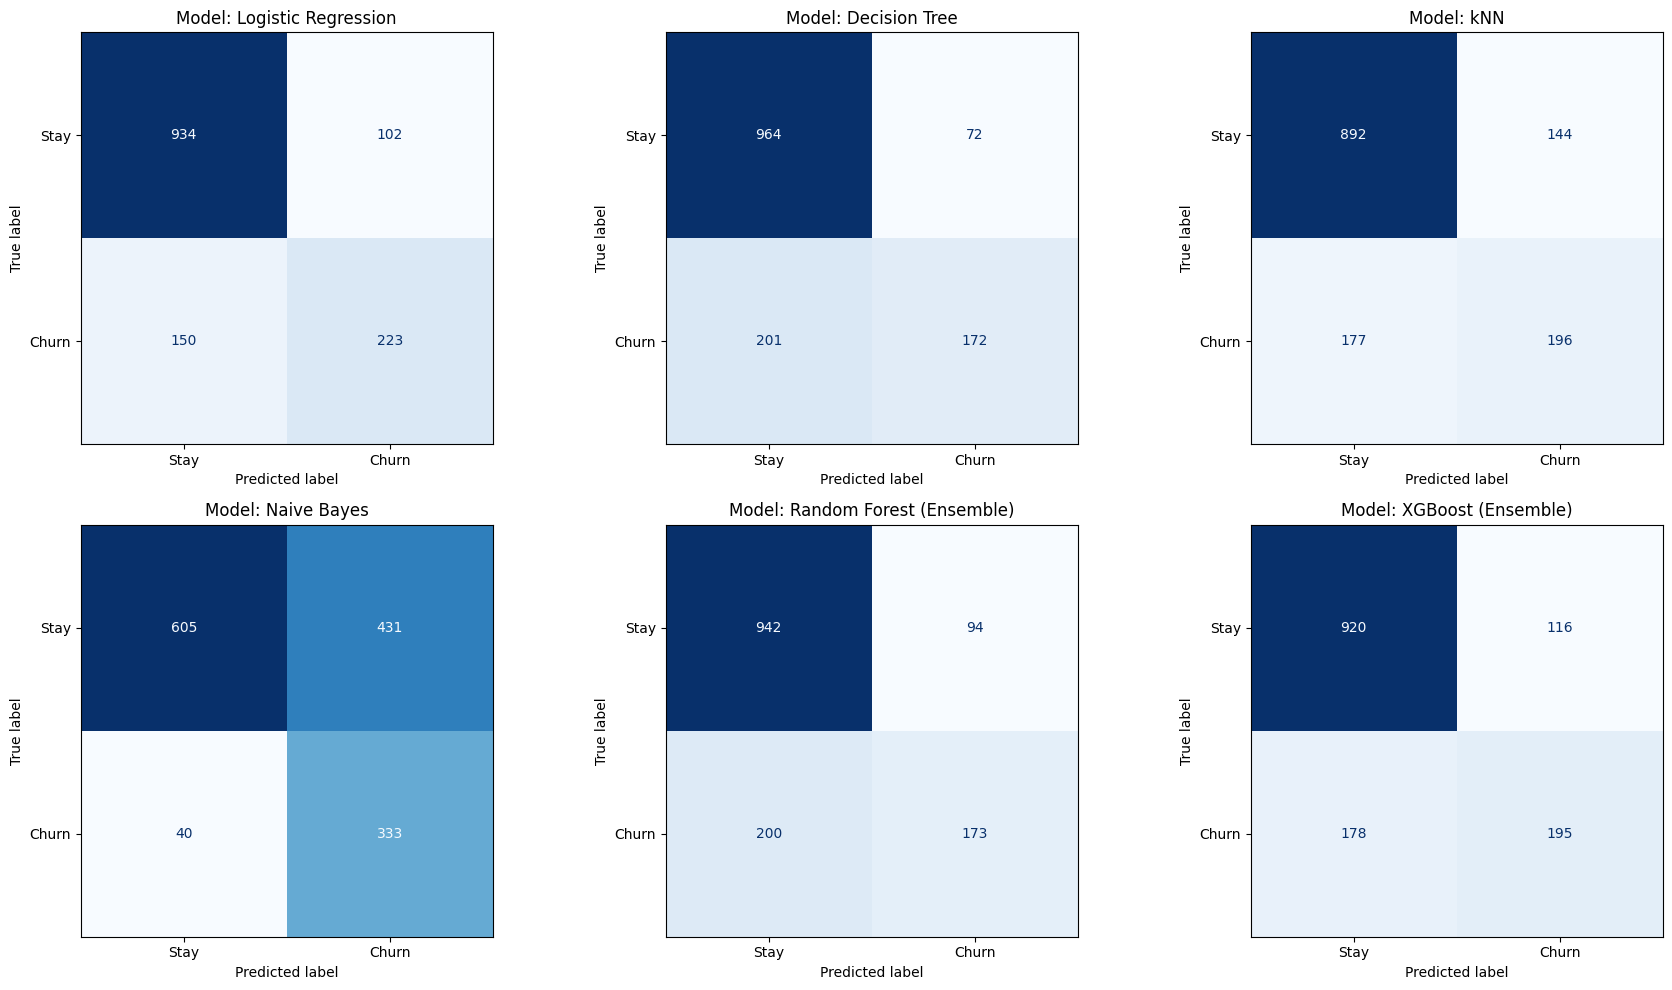

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set up a figure with a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Loop through each model and its index
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Display the matrix on the specific subplot axis
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stay', 'Churn'])
    disp.plot(cmap='Blues', ax=axes[i], colorbar=False)
    axes[i].set_title(f"Model: {name}")

plt.tight_layout()
plt.show()

# Saving Models for Streamlit App

In [14]:
import joblib
import os

# Create the folder
os.makedirs('model', exist_ok=True)

# Save each trained model
for name, model in models.items():
    # Replace spaces and special characters for filenames
    filename = f"model/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, filename)
    print(f"Saved: {filename}")

Saved: model/logistic_regression.pkl
Saved: model/decision_tree.pkl
Saved: model/knn.pkl
Saved: model/naive_bayes.pkl
Saved: model/random_forest_(ensemble).pkl
Saved: model/xgboost_(ensemble).pkl


# Test File Generation for App

In [ ]:
# Save the Scaler
joblib.dump(scaler, 'model/scaler.pkl')

# Save the Column names (this ensures app columns match model columns)
joblib.dump(X_train.columns.tolist(), 'model/model_columns.pkl')

# Save the RAW test data (not scaled/encoded) for the app upload
raw_sample = df.tail(100)
raw_sample.to_csv('telco_raw_test_sample.csv', index=False)

In [15]:
# Create a small test file with 100 rows to test in app
test_data_sample = pd.concat([X_test, y_test], axis=1).head(100)
test_data_sample.to_csv('telco_test_sample.csv', index=False)